<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Data-extractiom" data-toc-modified-id="Data-extractiom-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data extractiom</a></span></li><li><span><a href="#Passes" data-toc-modified-id="Passes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Passes</a></span></li><li><span><a href="#Required-data" data-toc-modified-id="Required-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Required data</a></span></li><li><span><a href="#Scaling-and-Encoding" data-toc-modified-id="Scaling-and-Encoding-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Scaling and Encoding</a></span></li><li><span><a href="#Сonclusion" data-toc-modified-id="Сonclusion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Сonclusion</a></span></li></ul></li><li><span><a href="#Problem-research" data-toc-modified-id="Problem-research-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem research</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Correction-of-imbalance" data-toc-modified-id="Correction-of-imbalance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correction of imbalance</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Customer churn

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure. 

Date source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Data description 

**Features**
- RowNumber — Row index in data
- CustomerId — Unique client id
- Surname — Last name
- CreditScore — Credit rating
- Geography — Country of residence
- Gender 
- Age 
- Tenure — How many years a person has been a bank client
- Balance — Account balance
- NumOfProducts — Numbers of bank product used by the client
- HasCrCard — Availability of a credit card
- IsActiveMember — Client activity 
- EstimatedSalary  

**Target**
- Exited — The fact thet the client left

## Data preparation

### Data extractiom

As usual, we load the necessary libraries and extract the data.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
import warnings

In [2]:
df = pd.read_csv("./Churn.csv")

Take a look at them.

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2261,2262,15681402,Ngozichukwuka,763,Germany,Female,61,1.0,66101.89,1,1,1,143981.27,0
4752,4753,15620111,Fan,659,France,Male,54,8.0,133436.52,1,1,0,56787.80,0
4944,4945,15722072,Hou,630,France,Male,53,5.0,138053.67,1,0,1,114110.97,0
18,19,15661507,Muldrow,587,Spain,Male,45,6.0,0.00,1,0,0,158684.81,0
9492,9493,15775192,Rounsevell,732,Germany,Female,48,4.0,102962.62,1,1,0,120852.85,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Passes

There are gaps in the column "Tenure", let's see if it is related to somthing.

In [5]:
df.loc[df["Tenure"].isna()] 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


As you can see, this omission is most likely a technical error and has nothing to do with the rest of the data. It is not possible to restore this column, and filling it with an average or some other value can be critical for the model, so we will simply cut off the row data.

In [6]:
df = df.loc[df["Tenure"].notna()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


### Required data

Now for further work, you need to leave the desired columns for the model: 
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited

It seems that this information may influence the choice of the client. 

In [8]:
df_train = df[["CreditScore",
              "Geography",
              "Gender",
              "Age",
              "Tenure",
              "Balance",
              "NumOfProducts",
              "HasCrCard",
              "IsActiveMember",
              "EstimatedSalary",
              "Exited"]]

In [9]:
df_train.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2427,798,Germany,Female,49,5.0,132571.67,1,1,1,31686.33,1


### Scaling and Encoding

Now you need to bring all the numerical metrics under one scale, and categorical ones into numerical ones.

In [10]:
df_train = pd.get_dummies(df_train, drop_first= True)

In [11]:
df_train.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1003,646,42,3.0,175159.9,2,0,0,67124.48,1,0,0,0


Categorical metrics have been translated, now let's deal with numerical ones.

In [12]:
column = ["CreditScore","Tenure", "Age", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler().fit(df_train[column])
df_train[column] = scaler.transform(df_train[column])
df_train.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1730,2.066937,-1.79528,0.691748,-1.22778,0.808655,1,0,-1.195601,0,0,0,1


Now the data is ready for further work.

### Сonclusion

Completely pre-processed the data for further dividing it into samples and training models.

## Problem research

We divide the samples into training and test. Validation is not needed, as we will use GridSearchCV there is cross-validation.

In [13]:
train, test = train_test_split(df_train, test_size=.25, random_state=46812)

In [14]:
display(train.info())
train.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 382 to 6261
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6818 non-null   float64
 1   Age                6818 non-null   float64
 2   Tenure             6818 non-null   float64
 3   Balance            6818 non-null   float64
 4   NumOfProducts      6818 non-null   float64
 5   HasCrCard          6818 non-null   int64  
 6   IsActiveMember     6818 non-null   int64  
 7   EstimatedSalary    6818 non-null   float64
 8   Exited             6818 non-null   int64  
 9   Geography_Germany  6818 non-null   uint8  
 10  Geography_Spain    6818 non-null   uint8  
 11  Gender_Male        6818 non-null   uint8  
dtypes: float64(6), int64(3), uint8(3)
memory usage: 552.6 KB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
812,-1.397607,-0.563636,-0.690152,-1.227780,0.808655,1,1,-0.720140,0,0,1,0
6430,0.282801,0.099557,-0.690152,0.832326,-0.912601,1,0,1.188393,0,0,1,0
9332,0.614733,2.183877,1.382699,1.150266,-0.912601,1,0,-0.895673,1,1,0,0


In [15]:
display(test.info())
test.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 3433 to 5742
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2273 non-null   float64
 1   Age                2273 non-null   float64
 2   Tenure             2273 non-null   float64
 3   Balance            2273 non-null   float64
 4   NumOfProducts      2273 non-null   float64
 5   HasCrCard          2273 non-null   int64  
 6   IsActiveMember     2273 non-null   int64  
 7   EstimatedSalary    2273 non-null   float64
 8   Exited             2273 non-null   int64  
 9   Geography_Germany  2273 non-null   uint8  
 10  Geography_Spain    2273 non-null   uint8  
 11  Gender_Male        2273 non-null   uint8  
dtypes: float64(6), int64(3), uint8(3)
memory usage: 184.2 KB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2741,-1.200522,-0.089927,1.037224,-1.227780,0.808655,1,0,0.632392,0,0,0,0
6724,1.050394,0.194298,1.037224,-1.227780,0.808655,1,0,0.688333,1,0,0,0
2221,1.205988,-0.374153,0.346273,0.894176,-0.912601,1,0,0.267007,1,1,0,0


We got two samples, now we need to separate the answers from the features.

In [16]:
train_features = train.drop(["Exited"], axis= 1)
train_answers = train["Exited"]
test_features = test.drop(["Exited"], axis= 1)
test_answers = test["Exited"]

Now you can train the model.

In [17]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : [100]}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812), parametrs)
model_forest.fit(train_features, train_answers)
model_forest.best_params_

CPU times: total: 1min 59s
Wall time: 1min 59s


{'max_depth': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [18]:
model_forest.best_score_

0.8621316829574232

There is a model that predicts the result in 86% of cases, a fairly good indicator. Now we need to evaluate its quality.

In [19]:
f1_score(test_answers, model_forest.predict(test_features))

0.550932568149211

F1 metric showed 0.55 result, to put it mildly, it's not really necessary to understand what's going on.

In [20]:
df_train["Exited"].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

Big class imbalance. 0s are almost 4 times more than 1s.

### Conclusion

The data is out of balance and needs to be fixed.

## Correction of imbalance

The easiest way is to use the `class_weight='balanced'` argument, let's see what we can get with it.

In [21]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : [100]}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812, class_weight='balanced'), parametrs)
model_forest.fit(train_features, train_answers)
model_forest.best_params_

CPU times: total: 1min 59s
Wall time: 2min


{'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [22]:
model_forest.best_score_

0.8427700668914311

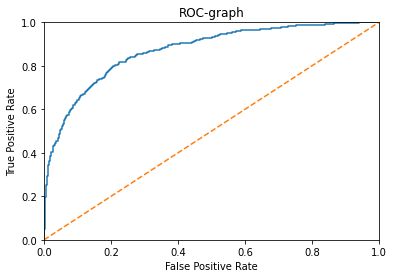

0.8712209570740574

In [23]:
probabilities_valid = model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-graph")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

In [24]:
f1_score(test_answers, model_forest.predict(test_features))

0.6242038216560508

Already better, now let's try to drop some of the zero lines

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [26]:
features_downsampled, target_downsampled = downsample(train_features, train_answers, 0.25)

In [27]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : [100]}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812), parametrs)
model_forest.fit(features_downsampled, target_downsampled)
model_forest.best_params_

CPU times: total: 1min 3s
Wall time: 1min 4s


{'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

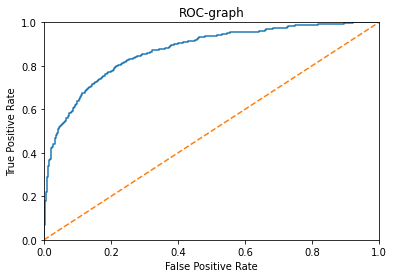

0.8703291977081542

In [28]:
probabilities_valid = model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-graph")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

In [29]:
f1_score(test_answers, model_forest.predict(test_features))

0.5980066445182725

The result is worse, so we will use weights.

I consider it not a good idea to apply the method with adding strings to 1, since we cannot be sure that we are adding "good" strings.

### Conclusion

After doing a little analytics, we found out that the target column has a class imbalance, so we applied two methods for balancing. The option with weights came up best, with it the f1 metric showed a result of 0.62, AUC-ROC 0.87 is not ideal but better than it was originally.

## Model testing

Now let's select a couple of models to solve the problem. For testing, let's take a random forest and a logistic model.

In [30]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : range(50,150,20)}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812, class_weight='balanced'), parametrs)
model_forest.fit(train_features, train_answers)
model_forest.best_params_

CPU times: total: 8min 52s
Wall time: 8min 56s


{'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 130}

In [31]:
model_forest.best_score_

0.8440904680248632

In [32]:
f1_score(test_answers, model_forest.predict(test_features))

0.6247334754797441

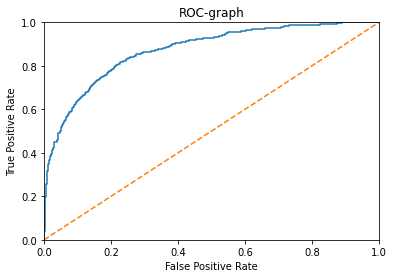

0.8719960830624036

In [33]:
probabilities_valid = model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-graph")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

In [34]:
%%time
warnings.filterwarnings("ignore")
parametrs = {"solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             "max_iter": range(1000,2000,100),
             "penalty": ['l1', 'l2', 'elasticnet', 'none']}
model_LR = GridSearchCV(LogisticRegression(random_state=46812,class_weight='balanced'), parametrs)
model_LR.fit(train_features, train_answers)
model_LR.best_params_

CPU times: total: 13.2 s
Wall time: 13.6 s


{'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg'}

In [35]:
model_LR.best_score_

0.7076875660254356

In [36]:
f1_score(test_answers, model_LR.predict(test_features))

0.505066250974279

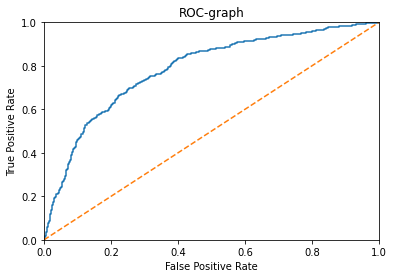

0.7842950727257705

In [37]:
probabilities_valid = model_LR.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-graph")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

### Conclusion

Random forest performed the best with this task showing 0.61 F1 metrics, correct answers 0.85 and AUC-ROC 0.87

## Conclusion

After analyzing the data, I found out that significant information about the number of years of the client in the bank was missing, which is why I had to throw out 10% of the data.

The problem of data imbalance was also revealed, which was quite simply solved by using weights.

As a result, we got a random forest with good indicators and metrics. The random forest had the following parameters:
- `'max_depth': 13`,
- `'min_samples_leaf': 5`,
- `'min_samples_split': 2`,
- `'n_estimators': 90`  

And showed 0.61 F1 metrics, correct answers 0.85 and AUC-ROC 0.87